# Model for USDCAD

### This workbook outlines a model for the price of Brent crude based on the Canadian Dollar. 



* Thesis: the primary driver of cross border currency transactions between the US and canada is for the purchase and sale of Oil. Therfore, movements in the two variables should be somewhat correlated. 

* Result: There is a signficant correlation between the two variables and that the CADUSD exchange rate will often lead Brent Prices on a longer term basis. 


In [29]:
# Importing all the packages I need

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression 

import scipy.stats as stats

import statsmodels 
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
from statsmodels.graphics.api import qqplot
import statsmodels.api as sm
import seaborn as sns

from statsmodels.graphics.regressionplots import plot_leverage_resid2

from statsmodels.distributions.mixture_rvs import mixture_rvs


### The data used is from the Federal reserve of St. Louis data base

In [30]:
data=pd.read_csv('USDCAD_MODEL.csv')

# This is our column of we use to predict
Y=data.iloc[4000:,1].values.reshape(-1,1) # Brent

# This is the column we want to predict
X=data.iloc[4000:, 0].values.reshape(-1,1) # USDCAD

# Scatterplot: USDCAD Exchange rate vs. Brent Crude Prices

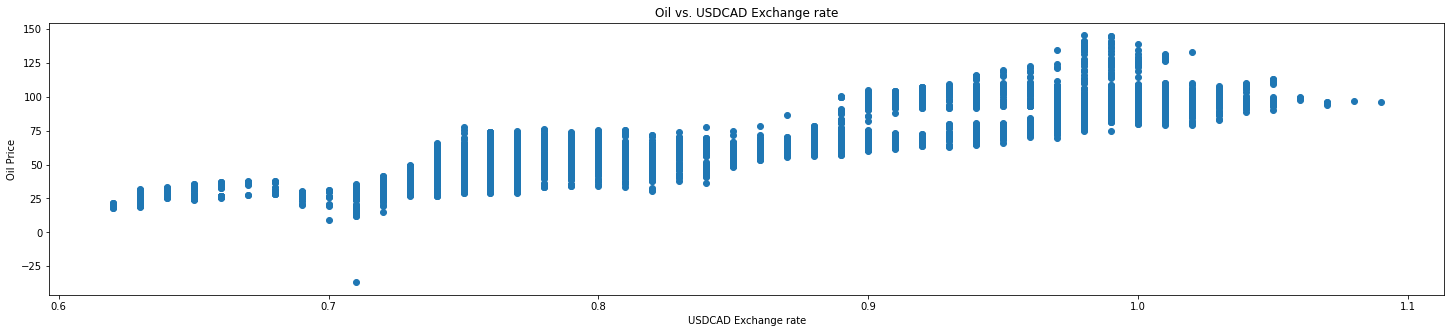

In [31]:
## Plot residuals in the time domain
plt.figure(figsize=(25, 5))

plt.scatter(X,Y)
plt.xlabel("USDCAD Exchange rate")
plt.ylabel("Oil Price")
plt.title("Oil vs. USDCAD Exchange rate")

plt.show()


# Fitting the Model

In [32]:
lr = LinearRegression()

# Fit the model
lr.fit(X,Y)

# Parameters generated by linear regression
a0 = lr.intercept_[0]
a1 = lr.coef_[0][0]

print("Parameters: ","a0=",round(a0,2),"a1=",round(a1,2))

Parameters:  a0= -103.46 a1= 199.07


# Plotting the results

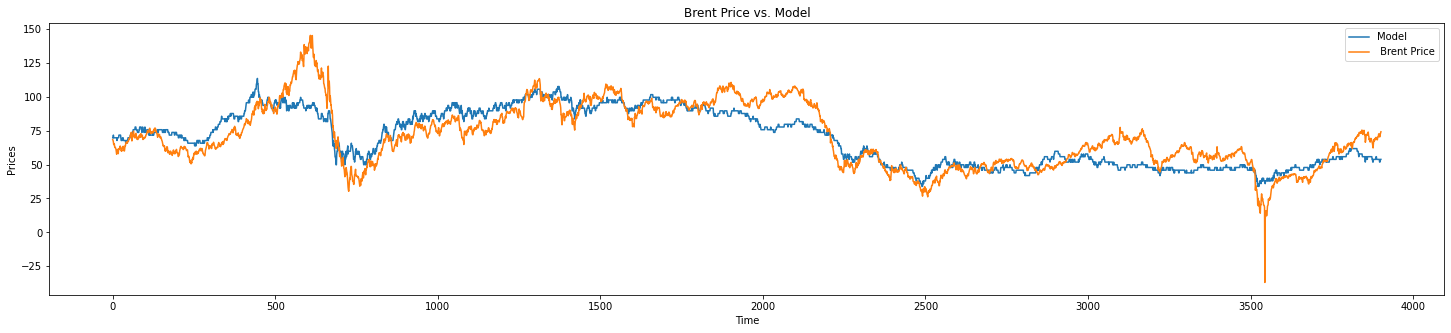

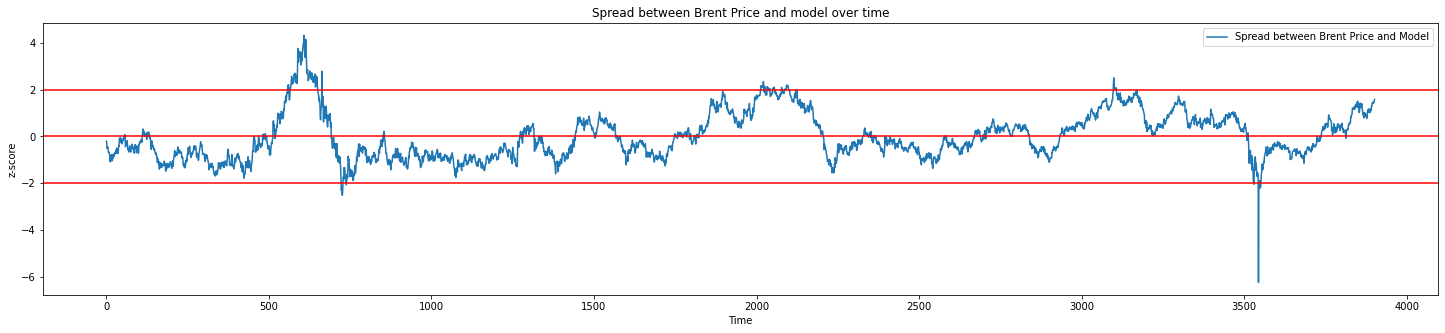

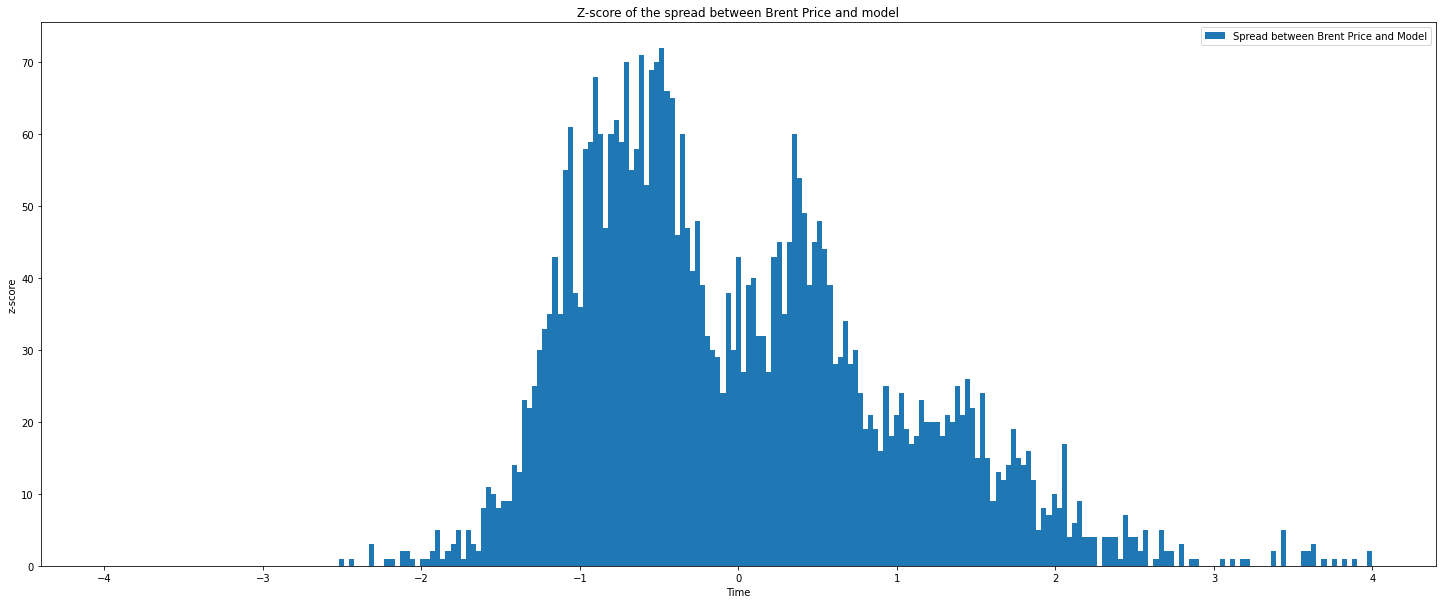

In [33]:
plt.figure(figsize=(25, 5))

plt.plot(a0 + a1*X[1000:])
plt.plot(Y[1000:])
plt.legend(['Model',' Brent Price'])
plt.ylabel("Prices")
plt.xlabel("Time")
plt.title("Brent Price vs. Model")

plt.show()

plt.figure(figsize=(25, 5))

plt.plot(stats.zscore(Y[1000:]-(a0 + a1*X[1000:])))
plt.axhline(y=0,color='red')
plt.axhline(y=2,color='red')
plt.axhline(y=-2,color='red')

plt.legend(['Spread between Brent Price and Model'])
plt.ylabel("z-score")
plt.xlabel("Time")
plt.title("Spread between Brent Price and model over time")

plt.show()

plt.figure(figsize=(25, 10))

plt.hist(stats.zscore(Y[1000:]-(a0 + a1*X[1000:])),bins=np.linspace(-4,4,250))

plt.legend(['Spread between Brent Price and Model'])
plt.ylabel("z-score")
plt.xlabel("Time")
plt.title("Z-score of the spread between Brent Price and model")

plt.show()

# Testing Assumptions

### Summary of results:

* R^2 of 0.934 indicates that 93% of the variation in the crude oil price is explained by the CADUSD excahnge rate
* p-value: 8.739224650705832e-63 - suggests the results are significant at a 5% level
* Chi^2 test: 285.79007877125304 - suggests the results are signifcant at a 5% level

In [34]:
model = sm.OLS(Y, X)
brent_model = model.fit()

print(brent_model.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.934
Model:                            OLS   Adj. R-squared (uncentered):              0.934
Method:                 Least Squares   F-statistic:                          6.988e+04
Date:                Sun, 03 Oct 2021   Prob (F-statistic):                        0.00
Time:                        16:05:35   Log-Likelihood:                         -21026.
No. Observations:                4902   AIC:                                  4.205e+04
Df Residuals:                    4901   BIC:                                  4.206e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

# QQ plot
* QQ plot suggests that our distribution could be normal but has heavy tails

C:\Users\James Stanley\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


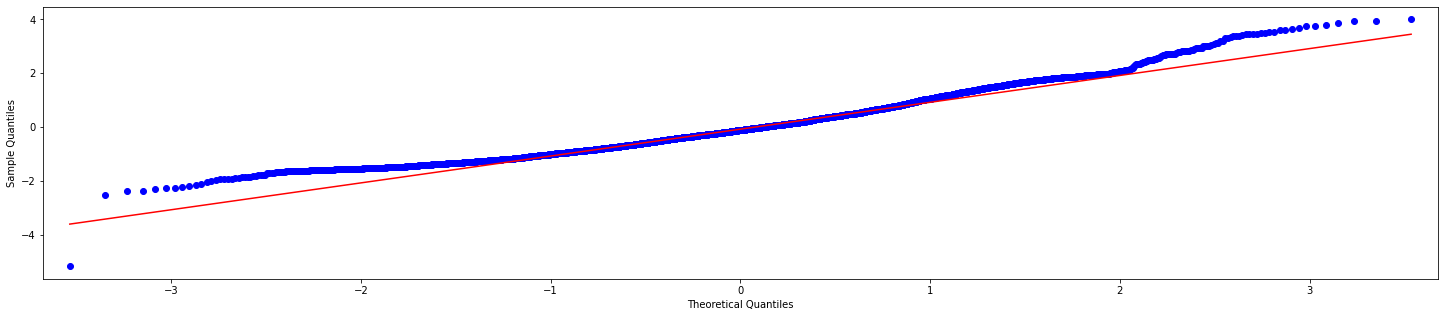

In [35]:
resid = brent_model.resid

fig = plt.figure(figsize=(25,5))
ax = fig.add_subplot(111)
fig = qqplot(resid, line='q', ax=ax, fit=True)

# P-value & Chi^2 tests

In [36]:
test = sms.omni_normtest(brent_model.resid)

print("Chi^2",test[0])
print("p-value: ",test[1])


Chi^2 285.79007877125304
p-value:  8.739224650705832e-63


# Scale Location
* Point 4544 is the day that oil went negative. This is an outlier in the data. 

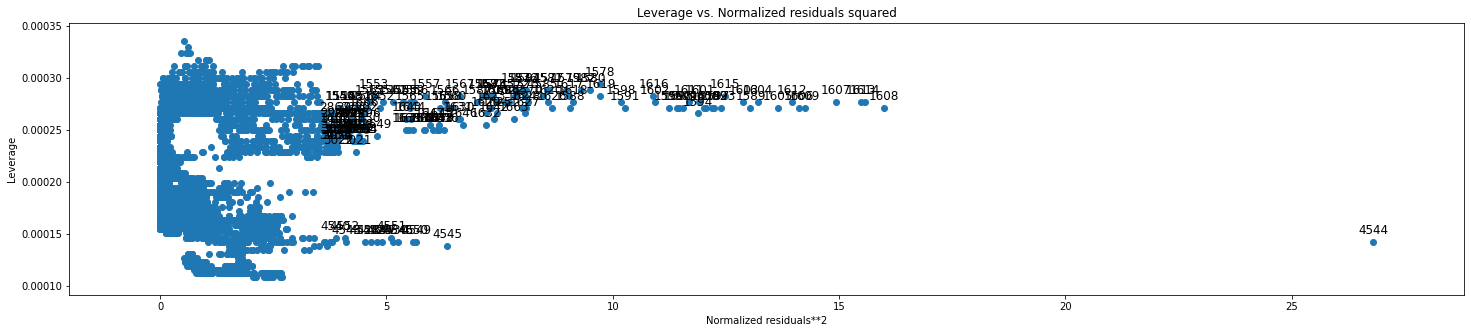

In [37]:
fig, ax = plt.subplots(figsize=(25, 5))
fig = plot_leverage_resid2(brent_model, ax=ax)